# **FUNCTIONS & CLASSES**

---



In [ ]:
import random 
import tracemalloc
import time

class Tasks:
    def __init__(self, ai, ci, di):
        self.ai = ai
        self.ci = ci
        self.di = di
        self.li = ci
    


def makeTasks(n,EDF = True):
    tasks = []
    ai = 0
    ci = 0
    di = 0
    for i in range(n):
        ci = random.randint(1, 6)
        di = random.randint(ci+(ai+ci), ci*(ai+2+n))
        t = Tasks(ai, ci, di)   
        
        if EDF:
          ai = random.randint(0, n)
        else:
          ai = 0
        tasks.append(t)
    return tasks





#Printing the Tasks
def printTasks(tasks,flag = False):
    if flag:
        print("{:^20s}{:^20s} {:^20s} {:^20s}{:^20s}".format("","Arrival Time :"," computation Time :"," Deadline :"," Computation left"))
        n = 0
        for i in tasks:
            n +=1
            
            print("{:^20s}{:^20s} {:^20s} {:^20s}{:^20s}".format(("Task "+str(n)),str(i.ai), str(i.ci), str(i.di), str(i.li)))
    if not flag:
        print("{:^20s}{:^20s} {:^20s} {:^20s}".format("","Arrival Time :"," computation Time :"," Deadline "))
        n = 0
        for i in tasks:
            n +=1
            
            print("{:^20s}{:^20s} {:^20s} {:^20s}".format(("Task "+str(n)),str(i.ai), str(i.ci), str(i.di)))


#Sorts the task according to deadline time
def scheduleTasks_d(tasks):
    sTasks = tasks
    for i in range(len(sTasks)):
        for j in range(i,len(sTasks)):
            if sTasks[i].di > sTasks[j].di:
                x = sTasks[i]
                sTasks[i] = sTasks[j]
                sTasks[j] = x
    return sTasks




#Sorts the task according to Arrival time
def scheduleTasks(tasks):
    sTasks = scheduleTasks_d(tasks)
    for i in range(len(sTasks)):
        for j in range(i,len(sTasks)):
            if sTasks[i].ai > sTasks[j].ai:
                x = sTasks[i]
                sTasks[i] = sTasks[j]
                sTasks[j] = x
    return sTasks




def find_deadline(tasks):
    deadline = 0
    for i in tasks:
        if i.di > deadline:
            deadline = i.di
    return deadline


#Schedules with EDF
def EDF(tasks,step = 1):
    steps = step
    tasks_a = scheduleTasks(tasks)
    deadline = find_deadline(tasks)
    iteration = 0
    
    for i in range(0,deadline,steps): #acts as a counter and stepper
    #check if all tasks are done
     
        
        execute = 0 #The task to be executed
        stop = True # this will stop the scheduling if all tasks are done
        for t in range(0,len(tasks_a)):
            if tasks_a[t].li > 0:
                stop = False
                if (tasks_a[execute].li <=0  and tasks_a[t].ai <= i) or (tasks_a[execute].ai >= i and tasks_a[t].ai <= i):
                    execute = t
                    
                    break
        print("\n\n")      
        print("Iteration "+str(iteration))
        print("Time "+str(i)) 
        printTasks(tasks_a,True)            
        iteration +=1
        
        
        
        for j in range(0,len(tasks_a)): #checks for earliest deadline task availability
            if tasks_a[j].ai <= i and tasks_a[j].li > 0: 
                for k in range(j,len(tasks_a)):
                    if tasks_a[k].ai <= i and tasks_a[k].li > 0:
                        if tasks_a[k].di < tasks_a[j].di :
                            if tasks_a[k].di < tasks_a[execute].di:
                                
                                execute = k
                                print("ARRIVAL "+ str(tasks_a[execute].ai))
                                print("TASK " + str(k+1))
                            # else:
                            #     execute = k
                            #     print("In ELSE : ARRIVAL "+ str(tasks_a[execute].ai))
                            #     print("In ELSE :  TASK " + str(k+1))
               
                
            
           
        
        if tasks_a[execute].li >0:
            tasks_a[execute].li = tasks_a[execute].li - step
        if stop:
            return tasks_a
    return tasks_a




def EDD(task):
    tasks = scheduleTasks_d(task)
    iteration = 0
    for i in range(0,len(tasks)):
       
        tasks[i].li = 0 
        print("\n\n")      
        print("Iteration "+str(iteration))
        print("Time "+str(i)) 
        printTasks(tasks,True)            
        iteration +=1
        printTasks(tasks,True)

# **MAIN**

---

*EDF IMPLEMENTED*

In [ ]:
#-----------------------------------MAIN----------------------------------------
number_of_tasks = 10


tasks = makeTasks(number_of_tasks)
# tasks = []

# for i in range(0,10,2):
#     task = Tasks(0+i, 2, i+3)
#     tasks.append(task)
    
printTasks(tasks)
print('\n\n')

# scheduledTasks = scheduleTasks(tasks)
# print("Scheduled Tasks")
# printTasks(scheduledTasks)
# print('\n\n')


# scheduledTasks = scheduleTasks_d(tasks)
# print("Scheduled Tasks")
# printTasks(scheduledTasks)



# get the start time
st = time.time()
tracemalloc.start()


edf = EDF(tasks)
# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print("\n")
print('Execution time:', elapsed_time, 'seconds')

current, peak = tracemalloc.get_traced_memory()
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")

print("Memory used "+str(peak/ 10**6 -current/ 10**6)+" MB")

tracemalloc.stop()


# c_time = 0
# d_time = 0
# for i in tasks:
#     c_time += i.ci
#     # if d_time < i.di:
#     #     d_time = i.di
#     d_time +=i.di
# print(c_time)

# print(d_time/len(tasks))

                       Arrival Time :     computation Time :        Deadline      
       Task 1                0                    1                    2          
       Task 2                0                    6                    69         
       Task 3                3                    5                    22         
       Task 4                1                    1                    12         
       Task 5                8                    5                    40         
       Task 6                8                    1                    17         
       Task 7                0                    6                    56         
       Task 8                1                    5                    62         
       Task 9                6                    4                    40         
      Task 10                3                    5                    22         






Iteration 0
Time 0
                       Arrival Time :     computation Time :  

# **EDD**

---



In [ ]:
number_of_tasks = 10

tasks = []
tasks = makeTasks(number_of_tasks,False)
printTasks(tasks)
# get the start time
st = time.time()
tracemalloc.start()
EDD(tasks)
# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print("\n")
print('Execution time:', elapsed_time, 'seconds')

current, peak = tracemalloc.get_traced_memory()
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")

print("Memory used "+str(peak/ 10**6 -current/ 10**6)+" MB")

tracemalloc.stop()

                       Arrival Time :     computation Time :        Deadline      
       Task 1                0                    1                    4          
       Task 2                0                    4                    40         
       Task 3                0                    5                    34         
       Task 4                0                    3                    11         
       Task 5                0                    4                    15         
       Task 6                0                    1                    7          
       Task 7                0                    6                    53         
       Task 8                0                    6                    29         
       Task 9                0                    6                    41         
      Task 10                0                    4                    48         



Iteration 0
Time 0
                       Arrival Time :     computation Time :     

# **GRAPH**

---



Streaming output truncated to the last 5000 lines.
      Task 71                0                    3                   249                  0          
      Task 72                0                    6                   252                  0          
      Task 73                0                    6                   254                  0          
      Task 74                0                    3                   259                  0          
      Task 75                0                    3                   267                  0          
      Task 76                0                    3                   278                  0          
      Task 77                0                    3                   287                  3          
      Task 78                0                    5                   293                  5          
      Task 79                0                    6                   331                  6          
      Task 80         

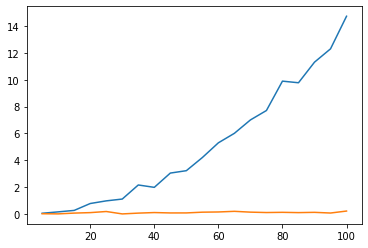

In [ ]:
import matplotlib.pyplot as plt

def runcomparison():
  number_of_tasks = 0
  x = []
  y = []
  z = []
  for i in range(20):
   
    number_of_tasks += 5
    
    tasks = []
    tasks = makeTasks(number_of_tasks,False)
    # get the start time
    st = time.time()
    tracemalloc.start()
    EDD(tasks)
    # get the end time
    et = time.time()

    # get the execution time
    elapsed_time = et - st
    y.append(elapsed_time)
    x.append(number_of_tasks)
    current, peak = tracemalloc.get_traced_memory()
    print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")

    print("Memory used "+str(peak/ 10**6 -current/ 10**6)+" MB")
    z.append((peak/ 10**6 -current/ 10**6))
    tracemalloc.stop()

  return x,y,z


  
xpoints,ypoints ,zpoints= runcomparison()
plt.plot(xpoints, ypoints)
plt.plot(xpoints, zpoints)
plt.show()

# Comparison of both EDD and EDF
*Different Task sets*

In [ ]:
import matplotlib.pyplot as plt

def runComparison_differentTaskSet(flag = True):
  number_of_tasks = 0
  x = []
  y = []
  z = []
  for i in range(1000):
    number_of_tasks += 5
    
    tasks = []
    
    tasks = makeTasks(number_of_tasks,flag)
    # get the start time
    st = time.time()
    tracemalloc.start()
    if flag:
      EDF(tasks)
    else:
      EDD(tasks)
    # get the end time
    et = time.time()

    # get the execution time
    elapsed_time = et - st
    y.append(elapsed_time)
    x.append(number_of_tasks)
    current, peak = tracemalloc.get_traced_memory()
    print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")

    print("Memory used "+str(peak/ 10**6 -current/ 10**6)+" MB")
    z.append((peak/ 10**6 -current/ 10**6))
    tracemalloc.stop()

  return x,y,z


  
xpoints,ypoints ,zpoints= runComparison_differentTaskSet(True)


plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.plot(xpoints, ypoints, label="Time")
plt.plot(xpoints, zpoints, label="Space")
plt.title("EDF")
plt.xlabel(' Tasks ')
plt.ylabel(' Time ')
  
xpoints,ypoints ,zpoints= runComparison_differentTaskSet(False) 

plt.subplot(1, 2, 2) # index 2
plt.plot(xpoints, ypoints, label="Time")
plt.plot(xpoints, zpoints, label="Space")
plt.title("EDD")
plt.xlabel(' Tasks ')
plt.ylabel(' Time ')






plt.show()

Current memory usage is 9.6e-05MB; Peak was 0.000192MB
Memory used 9.6e-05 MB
Current memory usage is 3.2e-05MB; Peak was 0.000224MB
Memory used 0.000192 MB
Current memory usage is 0.0MB; Peak was 0.000224MB
Memory used 0.000224 MB
Current memory usage is 0.0MB; Peak was 0.000288MB
Memory used 0.000288 MB
Current memory usage is 0.00016MB; Peak was 0.000288MB
Memory used 0.000128 MB
Current memory usage is 3.2e-05MB; Peak was 0.000336MB
Memory used 0.00030399999999999996 MB
Current memory usage is 0.0MB; Peak was 0.000336MB
Memory used 0.000336 MB
Current memory usage is 0.0MB; Peak was 0.000384MB
Memory used 0.000384 MB
Current memory usage is 0.000288MB; Peak was 0.000384MB
Memory used 9.6e-05 MB
Current memory usage is 0.0MB; Peak was 0.00044MB
Memory used 0.00044 MB
Current memory usage is 3.2e-05MB; Peak was 0.00044MB
Memory used 0.000408 MB
Current memory usage is 3.2e-05MB; Peak was 0.000504MB
Memory used 0.000472 MB
Current memory usage is 3.2e-05MB; Peak was 0.000504MB
Memory 

# Comparison of both EDD and EDF
*Same Task sets*

Current memory usage is 9.6e-05MB; Peak was 0.000192MB
Memory used 9.6e-05 MB
Current memory usage is 6.4e-05MB; Peak was 0.000144MB
Memory used 8e-05 MB
Current memory usage is 3.2e-05MB; Peak was 0.000224MB
Memory used 0.000192 MB
Current memory usage is 0.0MB; Peak was 0.000144MB
Memory used 0.000144 MB
Current memory usage is 3.2e-05MB; Peak was 0.000224MB
Memory used 0.000192 MB
Current memory usage is 0.0MB; Peak was 0.000144MB
Memory used 0.000144 MB
Current memory usage is 3.2e-05MB; Peak was 0.000288MB
Memory used 0.000256 MB
Current memory usage is 0.0MB; Peak was 0.000144MB
Memory used 0.000144 MB
Current memory usage is 0.00016MB; Peak was 0.000288MB
Memory used 0.000128 MB
Current memory usage is 0.000128MB; Peak was 0.000144MB
Memory used 1.600000000000001e-05 MB
Current memory usage is 0.001195MB; Peak was 0.002199MB
Memory used 0.001004 MB
Current memory usage is 0.0MB; Peak was 0.000144MB
Memory used 0.000144 MB
Current memory usage is 3.2e-05MB; Peak was 0.000336MB
Me

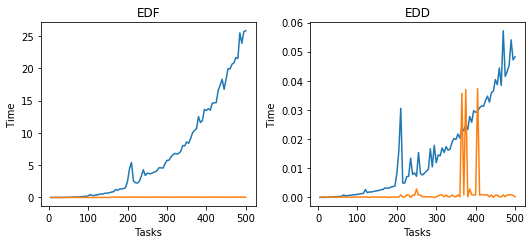

In [ ]:
import matplotlib.pyplot as plt

def runcomparison_sameTaskSet():
  number_of_tasks = 0
  edf_x = []
  edf_y = []
  edf_z = []
  edd_x = []
  edd_y = []
  edd_z = []
  for i in range(100):
    number_of_tasks += 5
    
    tasks_edd = []
    tasks_edf = makeTasks(number_of_tasks,True)
    for i in tasks_edf:
      i_t = i 
      i_t.ai = 0
      tasks_edd.append(i_t)
    # get the start time

    st = time.time()
    tracemalloc.start()
    EDF(tasks_edf)
    # get the end time
    et = time.time()

  

    # get the execution time
    elapsed_time = et - st
    edf_y.append(elapsed_time)
    edf_x.append(number_of_tasks)
    current, peak = tracemalloc.get_traced_memory()
    print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")

    print("Memory used "+str(peak/ 10**6 -current/ 10**6)+" MB")
    edf_z.append((peak/ 10**6 -current/ 10**6))
    tracemalloc.stop()


    st = time.time()
    tracemalloc.start()
    EDD(tasks_edd)
   # get the end time
    et = time.time()

    # get the execution time
    elapsed_time = et - st
    edd_y.append(elapsed_time)
    edd_x.append(number_of_tasks)
    current, peak = tracemalloc.get_traced_memory()
    print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")

    print("Memory used "+str(peak/ 10**6 -current/ 10**6)+" MB")
    edd_z.append((peak/ 10**6 -current/ 10**6))
    tracemalloc.stop()
  return edf_x,edf_y,edf_z,edd_x,edd_y,edd_z


  
edf_x,edf_y,edf_z,edd_x,edd_y,edd_z= runcomparison_sameTaskSet()

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.plot(edf_x, edf_y, label="Time")
plt.plot(edf_x, edf_z, label="Space")
plt.title("EDF")
plt.xlabel(' Tasks ')
plt.ylabel(' Time ')
  


plt.subplot(1, 2, 2) # index 2
plt.plot(edd_x, edd_y, label="Time")
plt.plot(edd_x, edd_z, label="Space")
plt.title("EDD")
plt.xlabel(' Tasks ')
plt.ylabel(' Time ')






plt.show()

# **Experimental** **Cell**

In [ ]:
import random 
import tracemalloc
import time
import matplotlib.pyplot as plt

#Sorts the task according to deadline time
def scheduleTasks_d(tasks):
    sTasks = tasks
    for i in range(len(sTasks)):
        for j in range(i,len(sTasks)):
            if sTasks[i].di > sTasks[j].di:
                x = sTasks[i]
                sTasks[i] = sTasks[j]
                sTasks[j] = x
    return sTasks

def find_deadline(tasks):
    deadline = 0
    for i in tasks:
        if i.di > deadline:
            deadline = i.di
    return deadline


#Sorts the task according to Arrival time
def scheduleTasks(tasks):
    sTasks = scheduleTasks_d(tasks)
    for i in range(len(sTasks)):
        for j in range(i,len(sTasks)):
            if sTasks[i].ai > sTasks[j].ai:
                x = sTasks[i]
                sTasks[i] = sTasks[j]
                sTasks[j] = x
    return sTasks

class Tasks:
    def __init__(self, ai, ci, di):
        self.ai = ai
        self.ci = ci
        self.di = di
        self.li = ci
    


def makeTasks(n,EDF = True):
    tasks = []
    ai = 0
    ci = 0
    di = 0
    for i in range(n):

        ci = 1 #random.randint(1, 6)
        di = random.randint(ci+(ai+ci), ci*(ai+2+n))
        t = Tasks(ai, ci, di)   
        
        if EDF:
          ai = random.randint(0, n)
        else:
          ai = 0
        tasks.append(t)
    return tasks


def EDD(task):
    tasks = scheduleTasks_d(task)
    
    for i in range(len(tasks)):
        tasks[i].li = 0 
        


#Schedules with EDF
def EDF(tasks,step = 1):
    steps = step
    tasks_a = scheduleTasks(tasks)
    deadline = find_deadline(tasks)
    iteration = 0
     #The task to be executed
    for i in range(deadline): #acts as a counter and stepper
    #check if all tasks are done
        execute = tasks_a[0]
        
       
        stop = True # this will stop the scheduling if all tasks are done
        for t in tasks_a:
            if t.li > 0:
                stop = False
                if (execute.li <=0  and t.ai <= i) or (execute.ai >= i and t.ai <= i):
                    execute = t        
                    break
            else:
                tasks_a.remove(t)
                
        iteration +=1
        
        
        
        for j in tasks_a: #checks for earliest deadline task availability
            if j.ai <= i and j.li > 0: 
                for k in tasks_a:
                    if k.ai <= i and k.li > 0:
                        if k.di < j.di :
                            if k.di < execute.di:
                                
                                execute = k
                                
    
        
        if execute.li >0:
            execute.li = execute.li - step
        if stop:
            return tasks_a
    return tasks_a




def runcomparison():
  number_of_tasks = 100
  x = []
  y = []
  z = []
  
   
    
  tasks = []
  tasks = makeTasks(number_of_tasks,False)
  # get the start time
  st = time.time()

  EDD(tasks)
  # get the end time
  et = time.time()

  # get the execution time
  elapsed_time = et - st
  y.append(elapsed_time)
  x.append(number_of_tasks)
    

  print(y[0])
  return x,y,z


  
xpoints,ypoints ,zpoints= runcomparison()
#plt.plot(xpoints, ypoints)
#plt.plot(xpoints, zpoints)
#plt.show()

0.0010037422180175781
